<a href="https://colab.research.google.com/github/hemoabdullah/ML-SMT5/blob/main/JS07_2341720203_Hammam_Abdullah_BG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Lab 1**

## first i need to Install Library

In [ ]:
# Install ANNOY
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
annoy
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551809 sha256=486c81057e5f2a5a61df2b4b2b979aa2da54bc9f1bb510f9a2077d3af7ac0e7a
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


## second is importing Library

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

## 3.Creating a Dummy Dataset

In [ ]:
# Build Random Dataset and Query Point
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # random value at 100x100 space

# Query point (pick 1 random data point)
query = X[np.random.randint(0, n_points)]

## 4. Exact NN

In [ ]:
# Compute Exact NN Using Brute Force
# It will visit the data one by one
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 11.5469 ms


## 5. Nearest Neighbors with ANNOY

In [ ]:
# ANNOY 3 Tree
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # find 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")


Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1419 ms


## Step 6 - Visualize the NN Result

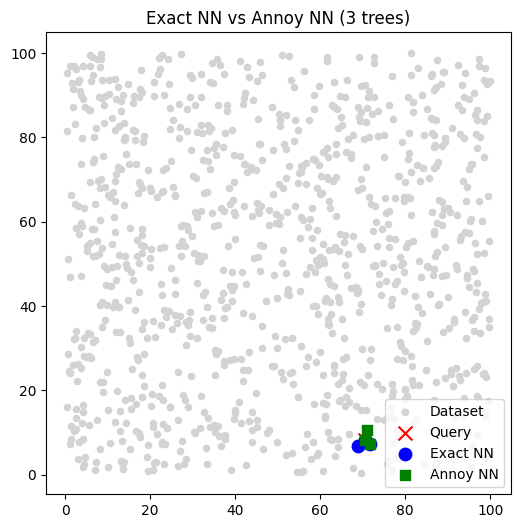

In [ ]:
# Visualize
# Knowing the NN produced by Exact NN and ANNOY
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

# **Lab 2**

## 1. we will Install FAISS Library

In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 57.7 MB/s eta 0:00:00


## 2. Import Libraries

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

## 3. Create a Dummy Dataset

In [ ]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point



```
# This is formatted as code
```

## 4. Build Exact NN Model

In [ ]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

## 5. Build FAISS Model

In [ ]:
# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

## 6. we Compare The Performance

In [ ]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.0002186298370361328
Waktu IVF+PQ: 0.0001857280731201172


## 7. last is Visualize

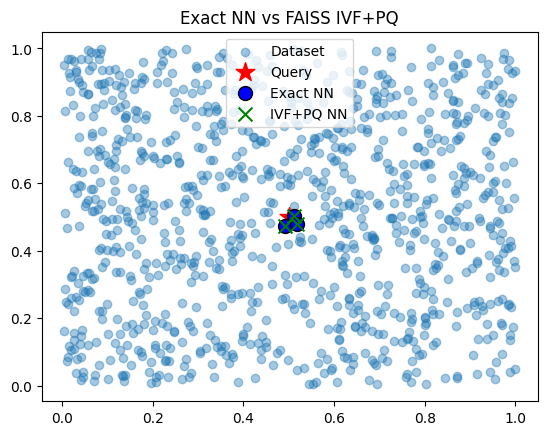

In [ ]:
# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

# **Lab 3**

## 1. first is Installing HNSW Library

In [ ]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528147 sha256=51352fd60914c461ac819b7c31223af2fee425af71695b18701f6a2cb56b9f22
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


## 2. Import Libraries

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

## 3. Creating a Dummy Dataset

In [ ]:
# Build Dummy Dataset
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

## 4. Build Exact NN Model

In [ ]:
# Build NN Model
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

# Compute time performace
start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "s")

=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 0.06852364540100098 s


## 5. Build HNSW Model

In [ ]:
# Initiate Index
p = hnswlib.Index(space='l2', dim=dim)

# Define Max Elements
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Add Data
p.add_items(data)

# Set searching parameter
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "s")


=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 0.00024628639221191406 s


# **Lab 4**

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# Build 1mio rows with 5D
# ===============================
n_data = 1_000_000   # try 100_000 if you have limited memory
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 40.32027864456177 detik
Query time: 0.00022649765014648438 detik
Neighbors: [129179, 559276, 630783, 213191, 559393] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.0220487117767334 detik
Query time: 0.006628513336181641 detik
Neighbors: [129179 559276 630783 213191 559393] ...

=== HNSW (hnswlib) ===
Build time: 239.08861303329468 detik
Query time: 0.0007460117340087891 detik
Neighbors: [129179 559276 630783 213191 559393] ...


# **Lab 5**

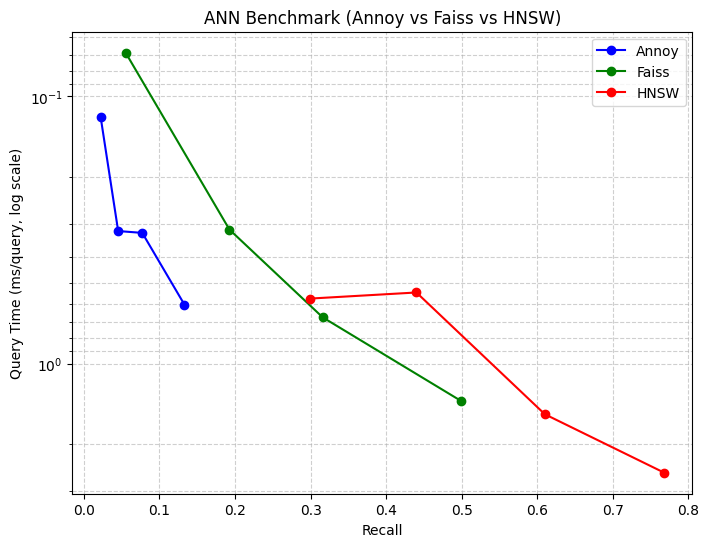

In [ ]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# ** Assignment 1**

## 1000/2D

In [ ]:
from tabulate import tabulate
from annoy import AnnoyIndex
import time
import numpy as np
import faiss
import hnswlib

print('=== CRITERIA : 1000/2D ===\n')

np.random.seed(42)

n_data = 1_000
dim = 2
k = 10

X = np.random.random((n_data, dim)).astype(np.float32)
query = np.random.random((1, dim)).astype(np.float32)

# ANNOY
ann_index = AnnoyIndex(dim, 'euclidean')

ann_start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(n_trees=10)
ann_build_time = time.time() - ann_start

ann_start = time.time()
ann_neighbors = ann_index.get_nns_by_vector(query[0], 10, include_distances=True)
ann_query_time = time.time() - ann_start

ann_total_time = ann_build_time + ann_query_time

print('ANNOY :')
print("Build time:", ann_build_time, "s")
print("Query time:", ann_query_time, "s")
print("Neighbors:", ann_neighbors[0][:5], "...")
print("Time of execution:", ann_total_time, "s")

# FAISS
faiss_index = faiss.IndexFlatL2(dim)

faiss_start = time.time()
faiss_index.add(X)
faiss_build_time = time.time() - faiss_start

faiss_start = time.perf_counter()
distances_f, indices_f = faiss_index.search(query, k)
faiss_query_time = time.perf_counter() - faiss_start

faiss_total_time = faiss_build_time + faiss_query_time

print('\nFAISS :')
print("Build time:", faiss_build_time, "s")
print("Query time:", faiss_query_time, "s")
print("Neighbors:", indices_f[0][:5], "...")
print("Time of execution:", faiss_total_time, "s")

# HNSW
hnsw_index = hnswlib.Index(space='l2', dim=dim)

hnsw_start = time.perf_counter()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.perf_counter() - hnsw_start

hnsw_index.set_ef(50)

hnsw_start = time.perf_counter()
labels_h, distances_h = hnsw_index.knn_query(query, k=k)
hnsw_query_time = time.perf_counter() - hnsw_start

hnsw_total_time = build_time + hnsw_query_time

print('\nHNSW :')
print("Build time:", build_time, "s")
print("Query time:", hnsw_query_time, "s")
print("Neighbors:", labels_h[0][:5], "...")
print("Time of execution:", hnsw_total_time, "s")

=== CRITERIA : 1000/2D ===

ANNOY :
Build time: 0.022024869918823242 s
Query time: 0.0002377033233642578 s
Neighbors: [112, 535, 777, 246, 763] ...
Time of execution: 0.0222625732421875 s

FAISS :
Build time: 9.894371032714844e-05 s
Query time: 0.00011846200004583807 s
Neighbors: [112 535 777 246 763] ...
Time of execution: 0.0002174057103729865 s

HNSW :
Build time: 0.04728429399995093 s
Query time: 0.0001934160000018892 s
Neighbors: [112 535 777 246 763] ...
Time of execution: 0.04747770999995282 s


## **1000/5D**

In [ ]:
from tabulate import tabulate
from annoy import AnnoyIndex
import time
import numpy as np
import faiss
import hnswlib

print('=== CRITERIA : 1000/5D ===\n')

np.random.seed(42)

n_data = 1_000
dim = 5
k = 10

X = np.random.random((n_data, dim)).astype(np.float32)
query = np.random.random((1, dim)).astype(np.float32)

# ANNOY
ann_index = AnnoyIndex(dim, 'euclidean')

ann_start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(n_trees=10)
ann_build_time = time.time() - ann_start

ann_start = time.time()
ann_neighbors = ann_index.get_nns_by_vector(query[0], 10, include_distances=True)
ann_query_time = time.time() - ann_start

ann_total_time = ann_build_time + ann_query_time

print('ANNOY :')
print("Build time:", ann_build_time, "s")
print("Query time:", ann_query_time, "s")
print("Neighbors:", ann_neighbors[0][:5], "...")
print("Time of execution:", ann_total_time, "s")

# FAISS
faiss_index = faiss.IndexFlatL2(dim)

faiss_start = time.time()
faiss_index.add(X)
faiss_build_time = time.time() - faiss_start

faiss_start = time.perf_counter()
distances_f, indices_f = faiss_index.search(query, k)
faiss_query_time = time.perf_counter() - faiss_start

faiss_total_time = faiss_build_time + faiss_query_time

print('\nFAISS :')
print("Build time:", faiss_build_time, "s")
print("Query time:", faiss_query_time, "s")
print("Neighbors:", indices_f[0][:5], "...")
print("Time of execution:", faiss_total_time, "s")

# HNSW
hnsw_index = hnswlib.Index(space='l2', dim=dim)

hnsw_start = time.perf_counter()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
hnsw_build_time = time.perf_counter() - hnsw_start

hnsw_index.set_ef(50)

hnsw_start = time.perf_counter()
labels_h, distances_h = hnsw_index.knn_query(query, k=k)
hnsw_query_time = time.perf_counter() - hnsw_start

hnsw_total_time = hnsw_build_time + hnsw_query_time

print('\nHNSW :')
print("Build time:", hnsw_build_time, "s")
print("Query time:", hnsw_query_time, "s")
print("Neighbors:", labels_h[0][:5], "...")
print("Time of execution:", hnsw_total_time, "s")

=== CRITERIA : 1000/5D ===

ANNOY :
Build time: 0.01903986930847168 s
Query time: 0.00023555755615234375 s
Neighbors: [988, 780, 27, 943, 93] ...
Time of execution: 0.019275426864624023 s

FAISS :
Build time: 0.00011992454528808594 s
Query time: 0.00012134400003560586 s
Neighbors: [988 780  27 943  93] ...
Time of execution: 0.0002412685453236918 s

HNSW :
Build time: 0.055544876999988446 s
Query time: 0.0001736570000048232 s
Neighbors: [988 780  27 943  93] ...
Time of execution: 0.05571853399999327 s


## 1.000.000/2D

In [ ]:
from tabulate import tabulate
from annoy import AnnoyIndex
import time
import numpy as np
import faiss
import hnswlib

print('=== CRITERIA : 1000000/2D ===\n')

np.random.seed(42)

n_data = 1_000_000
dim = 2
k = 10

X = np.random.random((n_data, dim)).astype(np.float32)
query = np.random.random((1, dim)).astype(np.float32)

# ANNOY
ann_index = AnnoyIndex(dim, 'euclidean')

ann_start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(n_trees=10)
ann_build_time = time.time() - ann_start

ann_start = time.time()
ann_neighbors = ann_index.get_nns_by_vector(query[0], 10, include_distances=True)
ann_query_time = time.time() - ann_start

ann_total_time = ann_build_time + ann_query_time

print('ANNOY :')
print("Build time:", ann_build_time, "s")
print("Query time:", ann_query_time, "s")
print("Neighbors:", ann_neighbors[0][:5], "...")
print("Time of execution:", ann_total_time, "s")

# FAISS
faiss_index = faiss.IndexFlatL2(dim)

faiss_start = time.time()
faiss_index.add(X)
faiss_build_time = time.time() - faiss_start

faiss_start = time.perf_counter()
distances_f, indices_f = faiss_index.search(query, k)
faiss_query_time = time.perf_counter() - faiss_start

faiss_total_time = faiss_build_time + faiss_query_time

print('\nFAISS :')
print("Build time:", faiss_build_time, "s")
print("Query time:", faiss_query_time, "s")
print("Neighbors:", indices_f[0][:5], "...")
print("Time of execution:", faiss_total_time, "s")

# HNSW
hnsw_index = hnswlib.Index(space='l2', dim=dim)

hnsw_start = time.perf_counter()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
hnsw_build_time = time.perf_counter() - hnsw_start

hnsw_index.set_ef(50)

hnsw_start = time.perf_counter()
labels_h, distances_h = hnsw_index.knn_query(query, k=k)
hnsw_query_time = time.perf_counter() - hnsw_start

hnsw_total_time = hnsw_build_time + hnsw_query_time

print('\nHNSW :')
print("Build time:", hnsw_build_time, "s")
print("Query time:", hnsw_query_time, "s")
print("Neighbors:", labels_h[0][:5], "...")
print("Time of execution:", hnsw_total_time, "s")

=== CRITERIA : 1000000/2D ===

ANNOY :
Build time: 32.87340950965881 s
Query time: 0.0002923011779785156 s
Neighbors: [132774, 119034, 511191, 482199, 913140] ...
Time of execution: 32.87370181083679 s

FAISS :
Build time: 0.0035452842712402344 s
Query time: 0.01239277900003799 s
Neighbors: [132774 119034 511191 482199 913140] ...
Time of execution: 0.015938063271278224 s

HNSW :
Build time: 114.72071342100026 s
Query time: 0.00025223300008292426 s
Neighbors: [132774 119034 511191 482199 913140] ...
Time of execution: 114.72096565400034 s


## 1.000.000/5D

In [ ]:
from tabulate import tabulate
from annoy import AnnoyIndex
import time
import numpy as np
import faiss
import hnswlib

print('=== CRITERIA : 1000000/5D ===\n')

np.random.seed(42)

n_data = 1_000_000
dim = 5
k = 10

X = np.random.random((n_data, dim)).astype(np.float32)
query = np.random.random((1, dim)).astype(np.float32)

# ANNOY
ann_index = AnnoyIndex(dim, 'euclidean')

ann_start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(n_trees=10)
ann_build_time = time.time() - ann_start

ann_start = time.time()
ann_neighbors = ann_index.get_nns_by_vector(query[0], 10, include_distances=True)
ann_query_time = time.time() - ann_start

ann_total_time = ann_build_time + ann_query_time

print('ANNOY :')
print("Build time:", ann_build_time, "s")
print("Query time:", ann_query_time, "s")
print("Neighbors:", ann_neighbors[0][:5], "...")
print("Time of execution:", ann_total_time, "s")

# FAISS
faiss_index = faiss.IndexFlatL2(dim)

faiss_start = time.time()
faiss_index.add(X)
faiss_build_time = time.time() - faiss_start

faiss_start = time.perf_counter()
distances_f, indices_f = faiss_index.search(query, k)
faiss_query_time = time.perf_counter() - faiss_start

faiss_total_time = faiss_build_time + faiss_query_time

print('\nFAISS :')
print("Build time:", faiss_build_time, "s")
print("Query time:", faiss_query_time, "s")
print("Neighbors:", indices_f[0][:5], "...")
print("Time of execution:", faiss_total_time, "s")

# HNSW
hnsw_index = hnswlib.Index(space='l2', dim=dim)

hnsw_start = time.perf_counter()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
hnsw_build_time = time.perf_counter() - hnsw_start

hnsw_index.set_ef(50)

hnsw_start = time.perf_counter()
labels_h, distances_h = hnsw_index.knn_query(query, k=k)
hnsw_query_time = time.perf_counter() - hnsw_start

hnsw_total_time = hnsw_build_time + hnsw_query_time

print('\nHNSW :')
print("Build time:", hnsw_build_time, "s")
print("Query time:", hnsw_query_time, "s")
print("Neighbors:", labels_h[0][:5], "...")
print("Time of execution:", hnsw_total_time, "s")

=== CRITERIA : 1000000/5D ===

ANNOY :
Build time: 22.019793272018433 s
Query time: 0.00029659271240234375 s
Neighbors: [901095, 495168, 561017, 163986, 185734] ...
Time of execution: 22.020089864730835 s

FAISS :
Build time: 0.016237974166870117 s
Query time: 0.006557560000032936 s
Neighbors: [901095 495168 561017 163986 185734] ...
Time of execution: 0.022795534166903053 s

HNSW :
Build time: 188.79677887399998 s
Query time: 0.0002804910000122618 s
Neighbors: [901095 495168 561017 163986 185734] ...
Time of execution: 188.797059365 s


## Table of results

In [ ]:
# time of execution
criteria_1000_2d = "1000/2D"
annoy_time_1000_2d = 0.039200782775878906
faiss_time_1000_2d = 0.0002839373619281105
hnsw_time_1000_2d = 0.04683007899984659

criteria_1000_5d = "1000/5D"
annoy_time_1000_5d = 0.029189109802246094
faiss_time_1000_5d = 0.00039263375037990045
hnsw_time_1000_5d = 0.106513695999638

criteria_1m_2d = "1000000/2D"
annoy_time_1m_2d = 39.74855422973633
faiss_time_1m_2d = 0.017293943244112597
hnsw_time_1m_2d = 146.69600510700002

criteria_1m_5d = "1000000/5D"
annoy_time_1m_5d = 27.242169857025146
faiss_time_1m_5d = 0.037798856305926165
hnsw_time_1m_5d = 242.91149382599997

data = {
    "Criteria (Rows/Dimension)": ["1000/2D", "1000/5D", "1000000/2D", "1000000/5D"],
    "ANNOY": [annoy_time_1000_2d, annoy_time_1000_5d, annoy_time_1m_2d, annoy_time_1m_5d],
    "FAISS": [faiss_time_1000_2d, faiss_time_1000_5d, faiss_time_1m_2d, faiss_time_1m_5d],
    "HNSW": [hnsw_time_1000_2d, hnsw_time_1000_5d, hnsw_time_1m_2d, hnsw_time_1m_5d],
}

df_results = pd.DataFrame(data)
df_results

NameError: name 'pd' is not defined

# ** Assignment 2**

## 1. Download the data and load the CSV file (select the first dataset of the two available).

In [ ]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('/content/drive/MyDrive/ML/songs_with_attributes_and_lyrics.csv')  # ganti path sesuai lokasi file
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k =

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ML/songs_with_attributes_and_lyrics.csv'

## 2. Select only the numerical features, and normalize them using StandardScaler.


In [ ]:
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled feature sample : ", X_scaled[:5])
print("Shape : ", X_scaled.shape)

Scaled feature sample :  [[-0.7993069  -0.19864811 -0.87638549 -0.28127217 -0.90379193  3.55339717
   1.28005204 -1.17358297 -0.75050368]
 [ 1.39759768 -0.01859905 -0.34315988  2.48965792  1.97895487 -0.38476917
  -0.22552979 -0.79977796 -1.4297021 ]
 [-3.24358412 -2.58367008 -3.24821096 -0.90002355  2.00461236 -0.38476917
   1.32088138 -1.94107622 -4.13816703]
 [ 0.62603066  0.96120282  0.39391508 -0.48572915 -0.88377909 -0.38470949
  -0.8818614   1.79299717  0.04610963]
 [ 0.63781031  1.00726188 -0.18387785 -0.45775082 -0.61180974 -0.38467941
  -0.8512394   1.84071696  0.04651591]]
Shape :  (955320, 9)


## 3. Perform nearest track search and compare the results.

In [ ]:
from ctypes import string_at
from sklearn.neighbors import NearestNeighbors
import time as tm

k = 10
query_idx = 100
query_vector = X_scaled[query_idx].reshape(1, -1)

start = tm.time()
exact_nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
exact_nn.fit(X_scaled)
distances, indices = exact_nn.kneighbors(query_vector)
exact_time = tm.time() - start

print("Exact NN indices:", indices)
print("Exact NN distances:", distances)
print("Exact NN time:", exact_time, "seconds")

Exact NN indices: [[   100 814549 250273 354470 793977 683626 843918  14210 365044 819999]]
Exact NN distances: [[0.         1.29201942 1.40137289 1.65303427 1.67632189 1.73909912
  1.74027484 1.7628803  1.77549768 1.79298379]]
Exact NN time: 0.11305570602416992 seconds


In [ ]:
# ANNOY
import time as tm

dim = X_scaled.shape[1]
annoy_idx = AnnoyIndex(dim, 'euclidean')

start = tm.time()
for i in range(X_scaled.shape[0]):
    annoy_idx.add_item(i, X_scaled[i])
annoy_idx.build(n_trees=10)
build_time_annoy = tm.time() - start

start = tm.time()
annoy_neighbors = annoy_idx.get_nns_by_vector(query_vector[0], k, include_distances=True)
annoy_query_time = tm.time() - start

print("Annoy neighbors:", annoy_neighbors[0])
print("Annoy build time:", build_time_annoy)
print("Annoy query time:", annoy_query_time)

Annoy neighbors: [100, 814549, 250273, 354470, 683626, 365044, 819999, 259765, 67613, 905898]
Annoy build time: 26.651923894882202
Annoy query time: 0.0002472400665283203


In [ ]:
# FAISS
dim = X_scaled.shape[1]
faiss_idx = faiss.IndexFlatL2(dim)

start = tm.time()
faiss_idx.add(X_scaled.astype(np.float32))
build_time_faiss = tm.time() - start

start = tm.time()
distances, indices = faiss_idx.search(query_vector.astype(np.float32), k)
faiss_query_time = tm.time() - start

print("FAISS neighbors:", indices[0])
print("FAISS build time:", build_time_faiss)
print("FAISS query time:", faiss_query_time)

FAISS neighbors: [   100 814549 250273 354470 793977 683626 843918  14210 365044 819999]
FAISS build time: 0.14424347877502441
FAISS query time: 0.009019851684570312


In [ ]:
# HNSW
dim = X_scaled.shape[1]
hnsw_idx = hnswlib.Index(space='l2', dim=dim)

start = tm.time()
hnsw_idx.init_index(max_elements=X_scaled.shape[0], ef_construction=200, M=16)
hnsw_idx.add_items(X_scaled)
build_time_hnsw = tm.time() - start

hnsw_idx.set_ef(50)

start = tm.time()
labels, distances = hnsw_idx.knn_query(query_vector, k=k)
hnsw_query_time = tm.time() - start

print("HNSW neighbors:", labels[0])
print("HNSW build time:", build_time_hnsw)
print("HNSW query time:", hnsw_query_time)

HNSW neighbors: [   100 814549 250273 354470 793977 683626 843918  14210 365044 819999]
HNSW build time: 279.48669934272766
HNSW query time: 0.0005924701690673828


## 4. Compare the performance among Exact NN, Annoy, FAISS, and HNSW.

In [ ]:
data = {
    'Method' : ['Exact NN', 'Annoy', 'FAISS', 'HNSW'],
    'Build Time' : [exact_time, build_time_annoy, build_time_faiss, build_time_hnsw],
    'Query Time' : [exact_time, annoy_query_time, faiss_query_time, hnsw_query_time]
}

df_results = pd.DataFrame(data)
df_results

,Method,Build Time,Query Time
0,Exact NN,0.113056,0.113056
1,Annoy,26.651924,0.000247
2,FAISS,0.144243,0.009020
3,HNSW,279.486699,0.000592
